ANTsPy and ANTsR inherit the ability to do multi-metric registration.

Such registrations assume that the feature images are in the same physical space and at least roughly aligned.

One may then use registration to optimize a multiple similarity metric objective function as in:

https://doi.org/10.3389/fninf.2014.00044

https://www.ncbi.nlm.nih.gov/pubmed/18995188

First, import ants, read some images and create some features.

In [75]:
import ants
image = ants.image_read(ants.get_ants_data('r16'))
image2 = ants.image_read(ants.get_ants_data('r64'))
aff = ants.registration( image, image2, "Affine" )
g1 = ants.iMath_grad( image )
g2 = ants.iMath_grad( image2 )

/Users/stnava/.pyenv/versions/3.8.1/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Perform a baseline registration with a single feature and create a couple of new metrics.  Each metric is defined by a name ("CC"), the input fixed (image), input moving (image2), a weight value (e.g. 2) and a sampling parameter ( for CC this defines a radius of 9x9 e.g. 4 extra pixels on all sides of the center pixel.  Five entries are needed in total.

In [76]:
reg1 = ants.registration( image, image2, 'SyNOnly', initial_transform=aff['fwdtransforms'][0], verbose=False )
demonsMetric = ['demons', g1, g2, 1, 1]
ccMetric = ['CC', image, image2, 1.5, 4 ]

Append the first metric to the metric list. In actuality this means that reg2 will be driven by both a demons metric and the default metric.

In [77]:
metrics = list( )
metrics.append( demonsMetric )
reg2 = ants.registration( image, image2, 'SyNOnly',
    multivariate_extras = metrics, initial_transform=aff['fwdtransforms'][0] )

Add a third metric and run this new registration.

In [78]:
metrics.append( ccMetric )
reg3 = ants.registration( image, image2, 'SyNOnly',
    multivariate_extras = metrics, initial_transform=aff['fwdtransforms'][0] )

Quantify the results in terms of mutual information of the registration results using the original image intensity.

In [79]:
print( ants.image_mutual_information( image, image2 ) )
print( ants.image_mutual_information( image, reg1['warpedmovout'] ) )
print( ants.image_mutual_information( image, reg2['warpedmovout'] ) )
print( ants.image_mutual_information( image, reg3['warpedmovout'] ) )

-0.17961406399219665
-0.76977124858361
-0.763288742703357
-0.8067789848956768


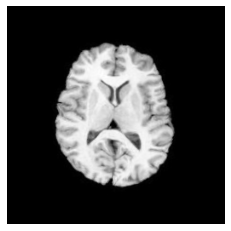

In [80]:
ants.plot(reg1['warpedmovout'])